In [155]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# Visualization Seaborn & Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None # show all columns
%matplotlib inline

In [190]:
superstore_df = pd.read_excel('./superstore.xls', sheet_name="Orders", index_col="Row ID")

In [191]:
# show top 5 rows
superstore_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [192]:
# removing unnecessary columns
superstore_df.drop(['Order ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name'], axis=1, inplace=True)
superstore_df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,
1,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [193]:
# get the number of rows and columns in a dataframe
superstore_df.shape

(9994, 15)

In [194]:
# get the name of columns of dataframe
superstore_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment',
       'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [195]:
# printing the info of each columns
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Date     9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Customer ID   9994 non-null   object        
 4   Segment       9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   State         9994 non-null   object        
 8   Region        9994 non-null   object        
 9   Category      9994 non-null   object        
 10  Sub-Category  9994 non-null   object        
 11  Sales         9994 non-null   float64       
 12  Quantity      9994 non-null   int64         
 13  Discount      9994 non-null   float64       
 14  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int6

In [196]:
# counts of unique 'Ship Mode'
superstore_df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

From here we can see the most widely opted shipping mode is Standard Class and the least used shipping mode is Same day.

In [197]:
# counts of unique 'Segment'
superstore_df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

From here we can tell that the Consumer has a largest customer base, followed by Corporate and home office has least customer base.

In [198]:
# counts of unique 'Region'
superstore_df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

From here we can tell that the order mostly came from West region and least from the south region.

In [200]:
# counts of unique 'Category'
superstore_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

As we can see 'Office Supplies' is the most popular category  whereas 'Technology' is the least popular category.

In [204]:
# counts of unique 'Sub-Category'
superstore_df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

There are various sub-category under each category. The most popular sub-category is Binders, followed by Paper. And the least popular sub-category is Copiers.

In [205]:
# printing unique values of shipping mode
superstore_df['Country'].unique()

array(['United States'], dtype=object)

From here we can conclude that the order came from inside United States only.

### Plotting categorical features as bar chart

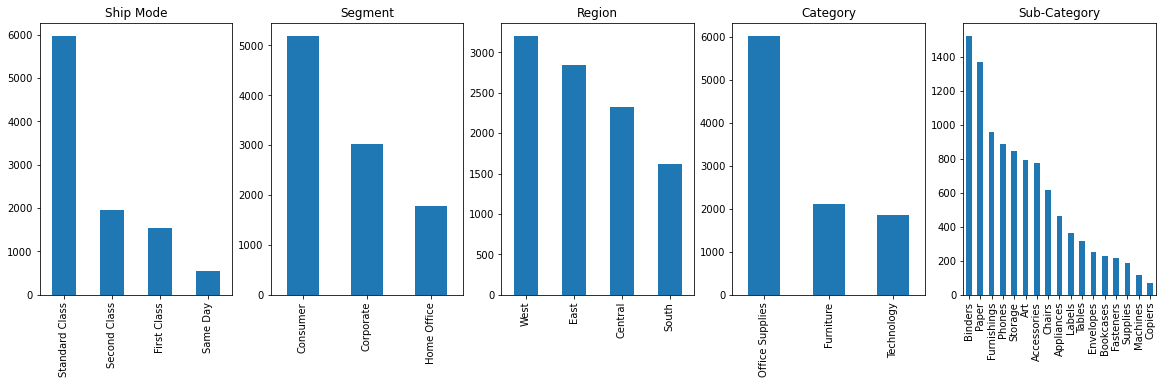

In [215]:
categorical_features = ['Ship Mode','Segment', 'Region', 'Category', 'Sub-Category']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(superstore_df[categorical_features]):
    superstore_df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], figsize=(20,5)).set_title(categorical_feature)
# fig.show()

array(['United States'], dtype=object)

SyntaxError: invalid syntax (<ipython-input-201-4db4a4fd7eb7>, line 1)

In [165]:
# create a map and show how many products have been shipped in each state

In [166]:
superstore_df.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [167]:
# check if there are any duplicate values
superstore_df.duplicated().sum()

1

In [168]:
# Get descriptive statistics summary
superstore_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [169]:
# selecting the prediction target
y = superstore_df.Profit
# Choosing "Features"
#The columns that are inputted into our model (and later used to make predictions) are called "features."
features = ['Sales', 'Quantity', 'Discount', 'Profit']
X = superstore_df[features]
print(X.describe())
X.head()

              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


,Sales,Quantity,Discount,Profit
Row ID,,,,
1,261.9600,2,0.00,41.9136
2,731.9400,3,0.00,219.5820
3,14.6200,2,0.00,6.8714
4,957.5775,5,0.45,-383.0310
5,22.3680,2,0.20,2.5164


### Train-test splitting

<b>The Problem with “In-Sample” Scores</b>

Using a single “sample” of data for both building the model and evaluating is not a good approach as there are chances that the model will yield  good result for training data, but if it does not hold the same patterns in new data, the model would be very inaccurate when used in practice. 

Since models’ practical value come from making predictions on new data, we measure performance on data that wasn’t used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the mode’s accuracy on data it has not seen before. This data is called validation data.

<b>Coding It</b>

The scikit-learn library has a function `train_test_split` to break up the data into two pieces. We will use some of that data as training data to fit the model, and we will use other data as validation data to calculate mean_absolute_error. 


In [170]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## Model Selection

### 1) Decision Tree

In [171]:
from sklearn.tree import DecisionTreeRegressor

In [172]:
# Define model. Specify a number for random_state to ensure same results each run
# For model reproducibility, set a numeric value for random_state when specifying the model
decision_tree_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=1000)

# Fit model
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=1000, random_state=0)

In [173]:
print('Making predictions for first five test data')
print(x_test.head())
print('The predictions are:')
print(decision_tree_model.predict(x_test.head()))
y_pred = decision_tree_model.predict(x_test)

Making predictions for first five test data
          Sales  Quantity  Discount   Profit
Row ID                                      
7934     23.360         2       0.0  11.6800
8658     22.660         2       0.0   9.7438
9600     35.208         1       0.2   2.6406
800     283.920         5       0.2  17.7450
3814     19.824         6       0.2   6.4428
The predictions are:
[11.66195238  9.73169167  2.67916444 17.73289333  6.3973    ]


### Model Validation
There are many metrics for summarizing model quality, but we'll use Mean Absolute Error (MAE).

In [174]:
from sklearn.metrics import mean_absolute_error

In [175]:
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mae

2.1456222303833736

The average profit of a superstore data is `28.65`, whereas the mean absolute error of model is `3.77`. 

There are many ways to improve this model, such as experimenting to find better features or different model types. We will use various models to find **MAE** of each models.

### Underfitting and Overfitting

**Overfitting** is when a model matches the training data almost perfectly, but does poorly in validation and other new data. On the other hand, **Underfitting** is when a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data. 

Since we care about accuracy on new data, which we estimate from our validation(test) data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the red validation curve in the figure below.

<img src="./images/overfitting_vs_underfitting.png"
     alt="Underfitting vs. Overfitting graph"
     style="height: 400px" />

We can control the tree_depth by supplying `max_leaf_nodes ` arguement. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

Below, I have created a utility function to help compare MAE scores for different value of `max_leaf_nodes`.

In [176]:
def get_mae(max_leaf_nodes):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    return(mae)

In [177]:
for max_leaf_nodes in [5, 50, 500, 1000]:
    mae = get_mae(max_leaf_nodes)
    print("Max leaf nodes: %d \t\t Mean Absolute Error: %f" %(max_leaf_nodes, mae))

Max leaf nodes: 5 		 Mean Absolute Error: 46.295234
Max leaf nodes: 50 		 Mean Absolute Error: 6.566768
Max leaf nodes: 500 		 Mean Absolute Error: 2.250440
Max leaf nodes: 1000 		 Mean Absolute Error: 2.145622


Of the options listed, 1000 is the optimal number of leaves.

### 2) Random Forest
The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. 

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
rf_model = RandomForestRegressor().fit(x_train, y_train)
rf_model

RandomForestRegressor()

In [180]:
print('Making predictions for first five test data')
print(x_test.head())
print('The predictions are:')
print(rf_model.predict(x_test.head()))
y_pred = rf_model.predict(x_test)

Making predictions for first five test data
          Sales  Quantity  Discount   Profit
Row ID                                      
7934     23.360         2       0.0  11.6800
8658     22.660         2       0.0   9.7438
9600     35.208         1       0.2   2.6406
800     283.920         5       0.2  17.7450
3814     19.824         6       0.2   6.4428
The predictions are:
[11.679079  9.744524  2.638244 17.745427  6.446982]


In [181]:
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mae

1.7607971650550174

This is a big improvement over the best decision tree error of 2.14. One of the best features of Random Forest models is that they generally work reasonably well by default options.

### 3. Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lin_reg = LinearRegression().fit(x_train,y_train)
lin_reg

LinearRegression()

In [184]:
print('Making predictions for first five test data')
print(x_test.head())
print('The predictions are:')
print(lin_reg.predict(x_test.head()))
y_pred = lin_reg.predict(x_test)

Making predictions for first five test data
          Sales  Quantity  Discount   Profit
Row ID                                      
7934     23.360         2       0.0  11.6800
8658     22.660         2       0.0   9.7438
9600     35.208         1       0.2   2.6406
800     283.920         5       0.2  17.7450
3814     19.824         6       0.2   6.4428
The predictions are:
[11.68    9.7438  2.6406 17.745   6.4428]


In [185]:
lin_r_mae = mean_absolute_error(y_test, y_pred)
lin_r_mae

1.1757931203753e-13

### Model Comparison

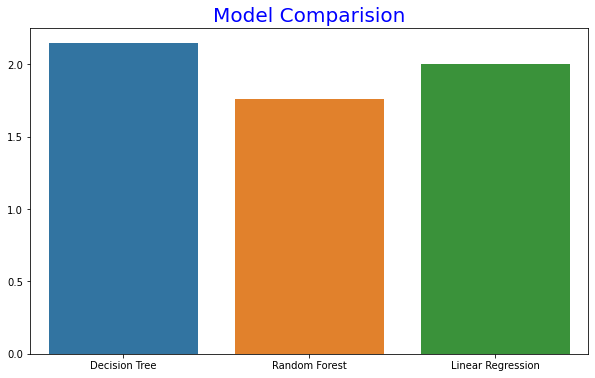

In [189]:
indexx = ["Decision Tree","Random Forest","Linear Regression"]
models_mae = [dt_mae, rf_mae, 2]

plt.figure(figsize=(10,6))
sns.barplot(x=indexx,y=models_mae)
plt.xticks()
plt.title('Model Comparision',color = 'Blue',fontsize=20);